In [5]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,svm
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X_train = iris.data[:, :2]  # we only take the first two features.
y_train = iris.target

train_X = iris.data[:, :2]  # we only take the first two features.
train_Y = iris.target

test_X = iris.data[:, :2]  # we only take the first two features.
test_Y = iris.target

### first xgboost
xgm = xgb.XGBClassifier()
xgm.fit(X_train, y_train)
y_pred = xgm.predict(X_train)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_train, predictions)
print(xgm)
print("XGBoost Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
XGBoost Accuracy: 88.00%


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [6]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [9]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBoostError: need to call fit beforehand

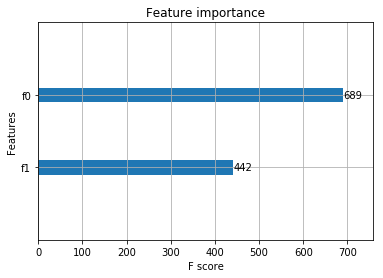

In [20]:
from xgboost import plot_importance
from matplotlib import pyplot
model.fit(X_train, y_train)
plot_importance(model)
pyplot.show()

In [7]:
### second xgboost

xg_train = xgb.DMatrix( train_X, label=train_Y)
xg_test = xgb.DMatrix(test_X, label=test_Y)
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 3
param['silent'] = True
param['nthread'] = -1
param['num_class'] = 3

In [3]:
watchlist = [ (xg_train,'train'), (xg_test, 'test') ]
num_round = 100
bst = xgb.train(param, xg_train, num_round, watchlist );
# get prediction
pred = bst.predict( xg_test );

print ('predicting, classification error=%f' % (sum( int(pred[i]) != test_Y[i] for i in range(len(test_Y))) / float(len(test_Y)) ))

# do the same thing again, but output probabilities
param['objective'] = 'multi:softprob'
bst = xgb.train(param, xg_train, num_round, watchlist );
# Note: this convention has been changed since xgboost-unity
# get prediction, this is in 1D array, need reshape to (ndata, nclass)
yprob = bst.predict(xg_test ).reshape( test_Y.shape[0], 3 )
ylabel = np.argmax(yprob, axis=1)

print ('predicting, classification error=%f' % (sum( int(ylabel[i]) != test_Y[i] for i in range(len(test_Y))) / float(len(test_Y)) ))

[0]	train-merror:0.18	test-merror:0.18
[1]	train-merror:0.18	test-merror:0.18
[2]	train-merror:0.18	test-merror:0.18
[3]	train-merror:0.18	test-merror:0.18
[4]	train-merror:0.173333	test-merror:0.173333
[5]	train-merror:0.173333	test-merror:0.173333
[6]	train-merror:0.173333	test-merror:0.173333
[7]	train-merror:0.173333	test-merror:0.173333
[8]	train-merror:0.173333	test-merror:0.173333
[9]	train-merror:0.18	test-merror:0.18
[10]	train-merror:0.18	test-merror:0.18
[11]	train-merror:0.18	test-merror:0.18
[12]	train-merror:0.18	test-merror:0.18
[13]	train-merror:0.18	test-merror:0.18
[14]	train-merror:0.18	test-merror:0.18
[15]	train-merror:0.18	test-merror:0.18
[16]	train-merror:0.18	test-merror:0.18
[17]	train-merror:0.18	test-merror:0.18
[18]	train-merror:0.18	test-merror:0.18
[19]	train-merror:0.173333	test-merror:0.173333
[20]	train-merror:0.173333	test-merror:0.173333
[21]	train-merror:0.173333	test-merror:0.173333
[22]	train-merror:0.173333	test-merror:0.173333
[23]	train-merror:

[76]	train-merror:0.146667	test-merror:0.146667
[77]	train-merror:0.146667	test-merror:0.146667
[78]	train-merror:0.146667	test-merror:0.146667
[79]	train-merror:0.146667	test-merror:0.146667
[80]	train-merror:0.146667	test-merror:0.146667
[81]	train-merror:0.146667	test-merror:0.146667
[82]	train-merror:0.146667	test-merror:0.146667
[83]	train-merror:0.146667	test-merror:0.146667
[84]	train-merror:0.146667	test-merror:0.146667
[85]	train-merror:0.146667	test-merror:0.146667
[86]	train-merror:0.146667	test-merror:0.146667
[87]	train-merror:0.146667	test-merror:0.146667
[88]	train-merror:0.14	test-merror:0.14
[89]	train-merror:0.133333	test-merror:0.133333
[90]	train-merror:0.133333	test-merror:0.133333
[91]	train-merror:0.14	test-merror:0.14
[92]	train-merror:0.133333	test-merror:0.133333
[93]	train-merror:0.126667	test-merror:0.126667
[94]	train-merror:0.126667	test-merror:0.126667
[95]	train-merror:0.126667	test-merror:0.126667
[96]	train-merror:0.126667	test-merror:0.126667
[97]	tra

In [21]:
## compare two data input method.
import os
X_train, y_train=load_svmlight_file(os.getcwd() + '/heart_scale/agaricus-lepiota.data.txt') # loading datasets in the svmlight/libsvm format.
xgm = xgb.XGBClassifier(max_depth=3)
xgm.fit(X_train, y_train)
y_pred = xgm.predict(X_train)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_train, predictions)
print(xgm)
print("XGBoost Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: could not convert string to float: b'p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u'